# Title: Customer Segment 

<h1 style="font-weight: bold; color: white;">HANNAN MUZAMMIL</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/han023) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/hannanmuzammil)

#### Objective
Predict the Air Quality Index (AQI) for a city using time-series forecasting techniques.
 
#### Steps
1. Data Handling
    * UsetheAir Quality Dataset (provided or from a public source).
    * Handle missing values in the dataset (e.g., forward fill, interpolation).
    * Perform exploratory data analysis (EDA) to identify trends, seasonality, and anomalies.
2. Feature Engineering
    * Extract features such as:
        * Hour, Day, Month.
        * Movingaverages and rolling statistics.
        * Lagfeatures for time-series data.
3. Model Training
    * Train a Long Short-Term Memory (LSTM) model for time-series forecasting.
    * CompareLSTMperformance with traditional models like ARIMA.
4. Visualization
    * Plot actual vs. predicted AQI values.
    * Create visualizations to highlight trends and model accuracy.

### **Meta-Data (About Dataset)**
#### Context
This dataset contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. This dataset was taken from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/index.php

#### Content
The dataset contains 9357 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

#### Attribute Information
0. Date (DD/MM/YYYY)
1. Time (HH.MM.SS)
2. True hourly averaged concentration CO in mg/m^3 (reference analyzer)
3. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
4. True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
6. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
7. True hourly averaged NOx concentration in ppb (reference analyzer)
8. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
9. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
10. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
11. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
12. Temperature in Â°C
13. Relative Humidity (%)
14. AH Absolute Humidity

#### Acknowledgements
Saverio De Vito (saverio.devito '@' enea.it), ENEA - National Agency for New Technologies, Energy and Sustainable Economic Development

#### Citation Request
S. De Vito, E. Massera, M. Piga, L. Martinotto, G. Di Francia, On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario, Sensors and Actuators B: Chemical, Volume 129, Issue 2, 22 February 2008, Pages 750-757, ISSN 0925-4005.
(https://www.sciencedirect.com/science/article/abs/pii/S0925400507007691)


In [1]:
#General modules
import numpy as np
import pandas as pd

#For plotting
import matplotlib.pyplot as plt
import seaborn as sns

#For dealing with time string types
import datetime

# model
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

#For model evaluation
from sklearn.metrics import mean_squared_error


In [2]:
# load the data from csv file placed locally in our pc
df = pd.read_csv('AirQuality.csv',sep=";")

# print the first 5 rows of the dataframe
df.head()

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578          NaN          NaN  
1  0,7255          NaN          NaN  
2  0,7502          NaN          NaN  
3  0,7867          NaN          NaN  
4  0,7888          NaN          NaN

## Exploratory Data Analysis (EDA) and data preprocessing

### Explore each Column

In [3]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [4]:
# data shpae
df.shape

(9471, 17)

In [5]:
df.describe()

PT08.S1(CO)     NMHC(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)  \
count  9357.000000  9357.000000    9357.000000  9357.000000   9357.000000   
mean   1048.990061  -159.090093     894.595276   168.616971    794.990168   
std     329.832710   139.789093     342.333252   257.433866    321.993552   
min    -200.000000  -200.000000    -200.000000  -200.000000   -200.000000   
25%     921.000000  -200.000000     711.000000    50.000000    637.000000   
50%    1053.000000  -200.000000     895.000000   141.000000    794.000000   
75%    1221.000000  -200.000000    1105.000000   284.000000    960.000000   
max    2040.000000  1189.000000    2214.000000  1479.000000   2683.000000   

           NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  Unnamed: 15  Unnamed: 16  
count  9357.000000   9357.000000  9357.000000          0.0          0.0  
mean     58.148873   1391.479641   975.072032          NaN          NaN  
std     126.940455    467.210125   456.938184          NaN          NaN  
min    -200.000000   -200.000000  -200.000000          NaN          NaN  
25%      53.000000   1185.000000   700.000000          NaN          NaN  
50%      96.000000   1446.000000   942.000000          NaN          NaN  
75%     133.000000   1662.000000  1255.000000          NaN          NaN  
max     340.000000   2775.000000  2523.000000          NaN          NaN

In [6]:
# Checking for missing values in each column of the dataset
# This helps identify columns that may need imputation or handling before further analysis
print("Missing Values per Column:")
df.isnull().sum()

Missing Values per Column:


Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [7]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [8]:
print(df.nunique())

Date              391
Time               24
CO(GT)            104
PT08.S1(CO)      1042
NMHC(GT)          430
C6H6(GT)          408
PT08.S2(NMHC)    1246
NOx(GT)           926
PT08.S3(NOx)     1222
NO2(GT)           284
PT08.S4(NO2)     1604
PT08.S5(O3)      1744
T                 437
RH                754
AH               6684
Unnamed: 15         0
Unnamed: 16         0
dtype: int64


In [9]:
# Missing value percentages
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


Date               1.203674
Time               1.203674
CO(GT)             1.203674
PT08.S1(CO)        1.203674
NMHC(GT)           1.203674
C6H6(GT)           1.203674
PT08.S2(NMHC)      1.203674
NOx(GT)            1.203674
PT08.S3(NOx)       1.203674
NO2(GT)            1.203674
PT08.S4(NO2)       1.203674
PT08.S5(O3)        1.203674
T                  1.203674
RH                 1.203674
AH                 1.203674
Unnamed: 15      100.000000
Unnamed: 16      100.000000
dtype: float64


Cleansing

In [10]:
df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], inplace=True)

In [11]:
df.replace(to_replace = -200, value = np.nan, inplace = True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [13]:
df.drop('NMHC(GT)', axis=1, inplace=True, errors = 'ignore') 
df = df.dropna()
df.head()

Date      Time CO(GT)  PT08.S1(CO) C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0  10/03/2004  18.00.00    2,6       1360.0     11,9         1046.0    166.0   
1  10/03/2004  19.00.00      2       1292.0      9,4          955.0    103.0   
2  10/03/2004  20.00.00    2,2       1402.0      9,0          939.0    131.0   
3  10/03/2004  21.00.00    2,2       1376.0      9,2          948.0    172.0   
4  10/03/2004  22.00.00    1,6       1272.0      6,5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1056.0    113.0        1692.0       1268.0  13,6  48,9  0,7578  
1        1174.0     92.0        1559.0        972.0  13,3  47,7  0,7255  
2        1140.0    114.0        1555.0       1074.0  11,9  54,0  0,7502  
3        1092.0    122.0        1584.0       1203.0  11,0  60,0  0,7867  
4        1205.0    116.0        1490.0       1110.0  11,2  59,6  0,7888

In [14]:
df['DateTime'] =  (df.Date) + ' ' + (df.Time)
df.DateTime = df.DateTime.apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H.%M.%S'))
df

Date      Time CO(GT)  PT08.S1(CO) C6H6(GT)  PT08.S2(NMHC)  \
0     10/03/2004  18.00.00    2,6       1360.0     11,9         1046.0   
1     10/03/2004  19.00.00      2       1292.0      9,4          955.0   
2     10/03/2004  20.00.00    2,2       1402.0      9,0          939.0   
3     10/03/2004  21.00.00    2,2       1376.0      9,2          948.0   
4     10/03/2004  22.00.00    1,6       1272.0      6,5          836.0   
...          ...       ...    ...          ...      ...            ...   
9352  04/04/2005  10.00.00    3,1       1314.0     13,5         1101.0   
9353  04/04/2005  11.00.00    2,4       1163.0     11,4         1027.0   
9354  04/04/2005  12.00.00    2,4       1142.0     12,4         1063.0   
9355  04/04/2005  13.00.00    2,1       1003.0      9,5          961.0   
9356  04/04/2005  14.00.00    2,2       1071.0     11,9         1047.0   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0       166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1       103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2       131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3       172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4       131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   
...       ...           ...      ...           ...          ...   ...   ...   
9352    472.0         539.0    190.0        1374.0       1729.0  21,9  29,3   
9353    353.0         604.0    179.0        1264.0       1269.0  24,3  23,7   
9354    293.0         603.0    175.0        1241.0       1092.0  26,9  18,3   
9355    235.0         702.0    156.0        1041.0        770.0  28,3  13,5   
9356    265.0         654.0    168.0        1129.0        816.0  28,5  13,1   

          AH            DateTime  
0     0,7578 2004-03-10 18:00:00  
1     0,7255 2004-03-10 19:00:00  
2     0,7502 2004-03-10 20:00:00  
3     0,7867 2004-03-10 21:00:00  
4     0,7888 2004-03-10 22:00:00  
...      ...                 ...  
9352  0,7568 2005-04-04 10:00:00  
9353  0,7119 2005-04-04 11:00:00  
9354  0,6406 2005-04-04 12:00:00  
9355  0,5139 2005-04-04 13:00:00  
9356  0,5028 2005-04-04 14:00:00  

[7393 rows x 15 columns]

In [15]:
df['Weekday'] = df['DateTime'].dt.day_name()
df['Month']   = df['DateTime'].dt.month_name()
df['Hour']    = df['DateTime'].dt.hour
df['Date']    = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.drop('Time', axis=1, inplace=True, errors = 'ignore') 
df.head()

Date CO(GT)  PT08.S1(CO) C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0 2004-03-10    2,6       1360.0     11,9         1046.0    166.0   
1 2004-03-10      2       1292.0      9,4          955.0    103.0   
2 2004-03-10    2,2       1402.0      9,0          939.0    131.0   
3 2004-03-10    2,2       1376.0      9,2          948.0    172.0   
4 2004-03-10    1,6       1272.0      6,5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
0        1056.0    113.0        1692.0       1268.0  13,6  48,9  0,7578   
1        1174.0     92.0        1559.0        972.0  13,3  47,7  0,7255   
2        1140.0    114.0        1555.0       1074.0  11,9  54,0  0,7502   
3        1092.0    122.0        1584.0       1203.0  11,0  60,0  0,7867   
4        1205.0    116.0        1490.0       1110.0  11,2  59,6  0,7888   

             DateTime    Weekday  Month  Hour  
0 2004-03-10 18:00:00  Wednesday  March    18  
1 2004-03-10 19:00:00  Wednesday  March    19  
2 2004-03-10 20:00:00  Wednesday  March    20  
3 2004-03-10 21:00:00  Wednesday  March    21  
4 2004-03-10 22:00:00  Wednesday  March    22

In [16]:
df = df[['Date','Month', 'Weekday','DateTime', 'Hour', 'CO(GT)','PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 
         'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]
df.head()

Date  Month    Weekday            DateTime  Hour CO(GT)  PT08.S1(CO)  \
0 2004-03-10  March  Wednesday 2004-03-10 18:00:00    18    2,6       1360.0   
1 2004-03-10  March  Wednesday 2004-03-10 19:00:00    19      2       1292.0   
2 2004-03-10  March  Wednesday 2004-03-10 20:00:00    20    2,2       1402.0   
3 2004-03-10  March  Wednesday 2004-03-10 21:00:00    21    2,2       1376.0   
4 2004-03-10  March  Wednesday 2004-03-10 22:00:00    22    1,6       1272.0   

  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0     11,9         1046.0    166.0        1056.0    113.0        1692.0   
1      9,4          955.0    103.0        1174.0     92.0        1559.0   
2      9,0          939.0    131.0        1140.0    114.0        1555.0   
3      9,2          948.0    172.0        1092.0    122.0        1584.0   
4      6,5          836.0    131.0        1205.0    116.0        1490.0   

   PT08.S5(O3)     T    RH      AH  
0       1268.0  13,6  48,9  0,7578  
1        972.0  13,3  47,7  0,7255  
2       1074.0  11,9  54,0  0,7502  
3       1203.0  11,0  60,0  0,7867  
4       1110.0  11,2  59,6  0,7888

In particular, it can be seen that all the pollutant concentrations detected by the sensors are highly correlated with one another. Interestingly, for some reason the readings from the sensor 'PT08.S3(NOx)' are anticorrelated with one another. This would suggest that the levels of Nitrous Oxide(s) are decreasing with increasing levels of the other pollutants. Why would this be? Is this a real effect?

Other things that are noteworthy are the distribution shapes for each variable. Most of them appear to have approximately unimodal distributions (that also show right-skewedness). Some of the exceptions are PT08.S4(NO2) are AH where there is fairly clear bimodal behavior occurring. This suggests that there is further cleaning up that I need to do since skewedness in a distribution is related to the presence of outliers.

In [17]:
# Calculate IQR
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Define scale for outlier detection
scale = 1.4
lower_lim = Q1 - scale * IQR
upper_lim = Q3 + scale * IQR

# Define target columns and align indices
cols = df.columns[5:]  # Adjust based on your DataFrame structure
common_cols = lower_lim.index.intersection(cols)
lower_lim = lower_lim[common_cols]
upper_lim = upper_lim[common_cols]
cols = common_cols  # Update to aligned columns

# Create condition for filtering
condition = ~((df[cols] < lower_lim) | (df[cols] > upper_lim)).any(axis=1)

# Generate new DataFrame
df_filtered = df[condition]


In [18]:
df.shape

(7393, 17)

Hmmm, I've played around with different outlier sensitivities using the IQR and CO(GT), NOx(GT) and C6H6 columns still have several outliers causing skewedness.

As I mentioned earlier, C6H6 is a hydrocarbon and we have another sensor that is detecting nonmetallic hydrocarbons (NMHC). Therefore, the C6H6 column is sorta redundant and we can drop it without losing too much information.

With NOx, we still have a sensor in the dataframe responsible for detecting nitrous oxides. This means that the NOx column is similarly redundant.

With CO(GT), we still have a sensor in the dataframe responsible for specifically detecting CO. This means that the CO(GT) column is also redundant.

Using that same logic, I'll drop the NO2(GT) column as well.

As such, I'll remove them from the dataset.

In [19]:
df_filtered.drop(['CO(GT)']  ,axis=1, inplace=True, errors = 'ignore')
df_filtered.drop(['NOx(GT)'] ,axis=1, inplace=True, errors = 'ignore')
df_filtered.drop(['C6H6(GT)'],axis=1, inplace=True, errors = 'ignore')
df_filtered.drop(['NO2(GT)'] ,axis=1, inplace=True, errors = 'ignore')
df_filtered.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18284\2182467070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(['CO(GT)']  ,axis=1, inplace=True, errors = 'ignore')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18284\2182467070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(['NOx(GT)'] ,axis=1, inplace=True, errors = 'ignore')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18284\2182467070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

Date  Month    Weekday            DateTime  Hour  PT08.S1(CO)  \
0 2004-03-10  March  Wednesday 2004-03-10 18:00:00    18       1360.0   
1 2004-03-10  March  Wednesday 2004-03-10 19:00:00    19       1292.0   
2 2004-03-10  March  Wednesday 2004-03-10 20:00:00    20       1402.0   
3 2004-03-10  March  Wednesday 2004-03-10 21:00:00    21       1376.0   
4 2004-03-10  March  Wednesday 2004-03-10 22:00:00    22       1272.0   

   PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0         1046.0        1056.0        1692.0       1268.0  13,6  48,9  0,7578  
1          955.0        1174.0        1559.0        972.0  13,3  47,7  0,7255  
2          939.0        1140.0        1555.0       1074.0  11,9  54,0  0,7502  
3          948.0        1092.0        1584.0       1203.0  11,0  60,0  0,7867  
4          836.0        1205.0        1490.0       1110.0  11,2  59,6  0,7888

### Visualize Key Features

In [20]:
month_df_list = []
day_df_list   = []
hour_df_list  = []

months = ['January','February','March', 'April', 'May','June', 
          'July', 'August', 'September', 'October', 'November', 'December']

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for month in months:
    temp_df = df_filtered.loc[(df_filtered['Month'] == month)]
    month_df_list.append(temp_df)

for day in days:
    temp_df = df_filtered.loc[(df_filtered['Weekday'] == day)]
    day_df_list.append(temp_df)

for hour in range(24):
    temp_df = df_filtered.loc[(df_filtered['Hour'] == hour)]
    hour_df_list.append(temp_df)

In [21]:
def df_time_plotter(df_list, time_unit, y_col):
    
    months = ['January','February','March', 'April', 'May','June', 
              'July', 'August', 'September', 'October', 'November', 'December']
    
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    if time_unit == 'M':
        nRows = 3
        nCols = 4
        n_iter = len(months)
    elif time_unit == 'D':
        nRows = 2
        nCols = 4
        n_iter = len(days)
    elif time_unit == 'H':
        nRows = 4
        nCols = 6
        n_iter = 24
    else:
        print('time_unit must be a string equal to M,D, or H')
        return 0
        
    fig, axs = plt.subplots(nrows=nRows, ncols=nCols, figsize = (40,30))
    axs = axs.ravel()
    for i in range(n_iter):
        data = df_list[i]
        ax = axs[i]
        data.plot(kind ='scatter', x = 'DateTime', y= y_col , ax = ax, fontsize = 24)
        ax.set_ylabel('Pollutant Concentration',fontsize=30)
        ax.set_xlabel('')
        if time_unit == 'M':
            ax.set_title(y_col + ' ' + months[i],  size=40) # Title
        elif time_unit == 'D':
            ax.set_title(y_col + ' ' + days[i],  size=40) # Title
        else:
             ax.set_title(y_col + ' ' + str(i),  size=40) # Title
        ax.tick_params(labelrotation=60)

        #plt.xlim([datetime.date(2004, 3, 10), datetime.date(2004, 3, 30)])
    # set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
    plt.show() # Depending on whether you use IPython or interactive mode, etc.

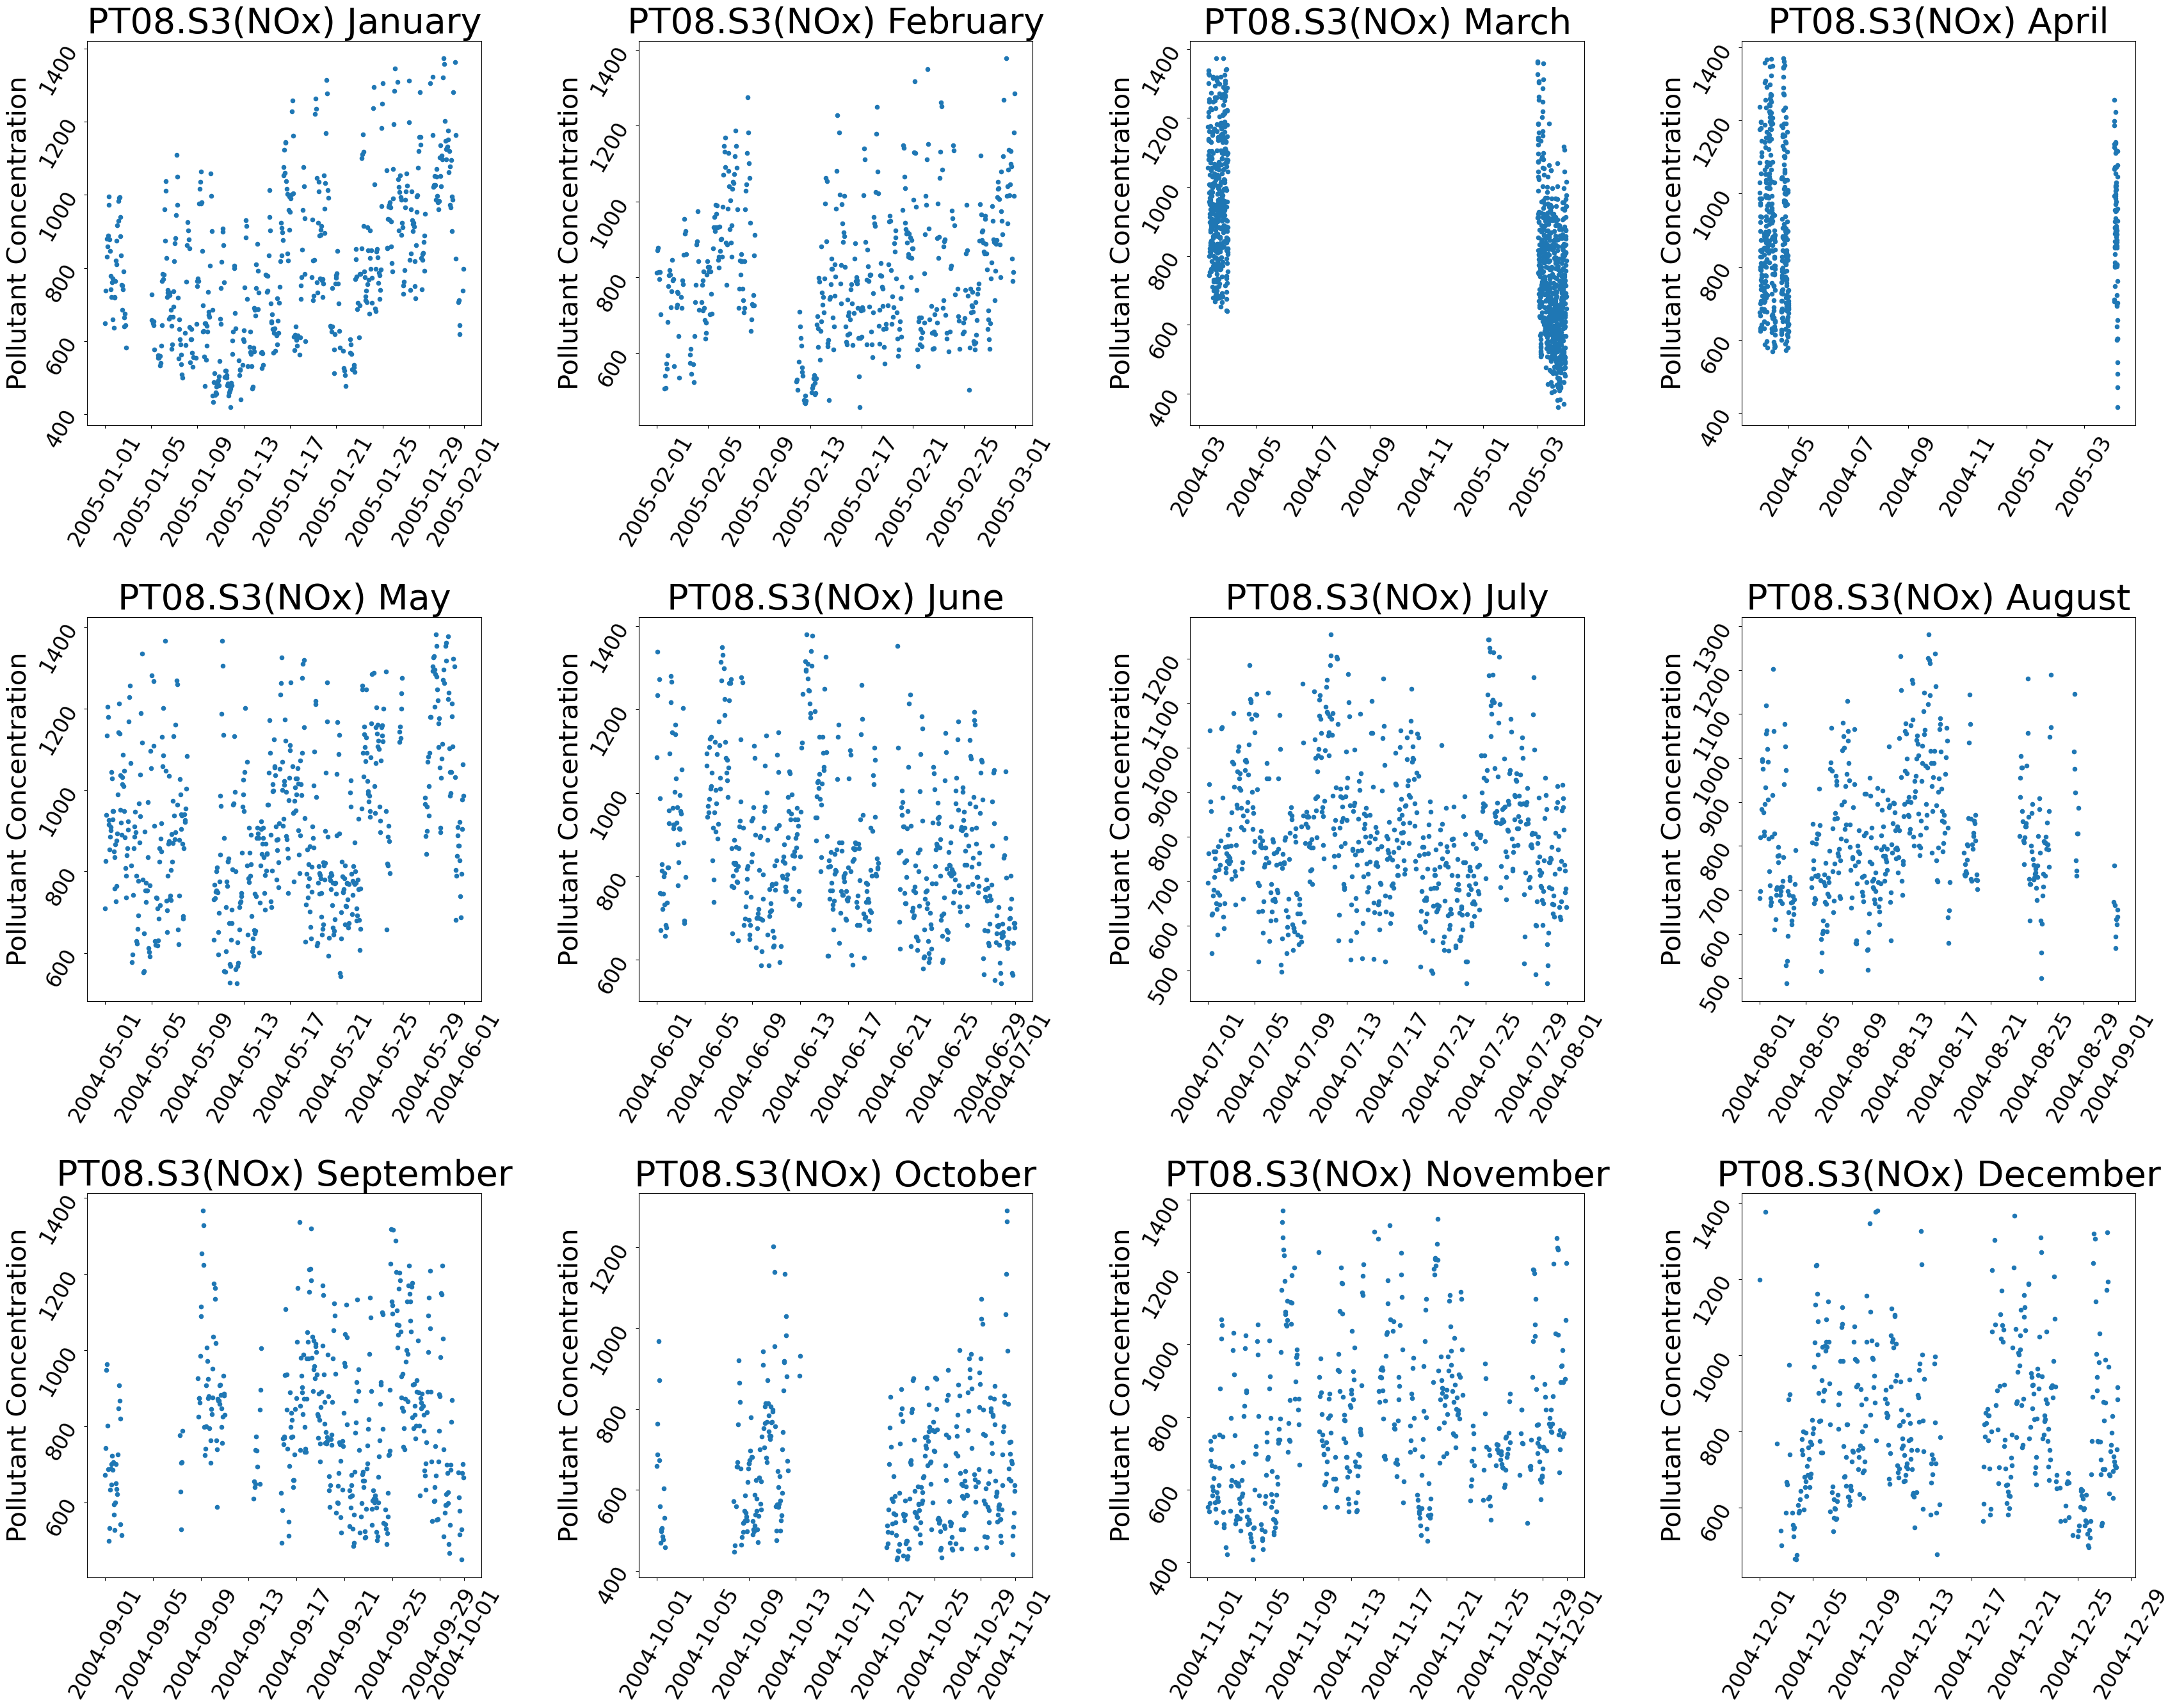

In [22]:
df_time_plotter(month_df_list,'M','PT08.S3(NOx)')


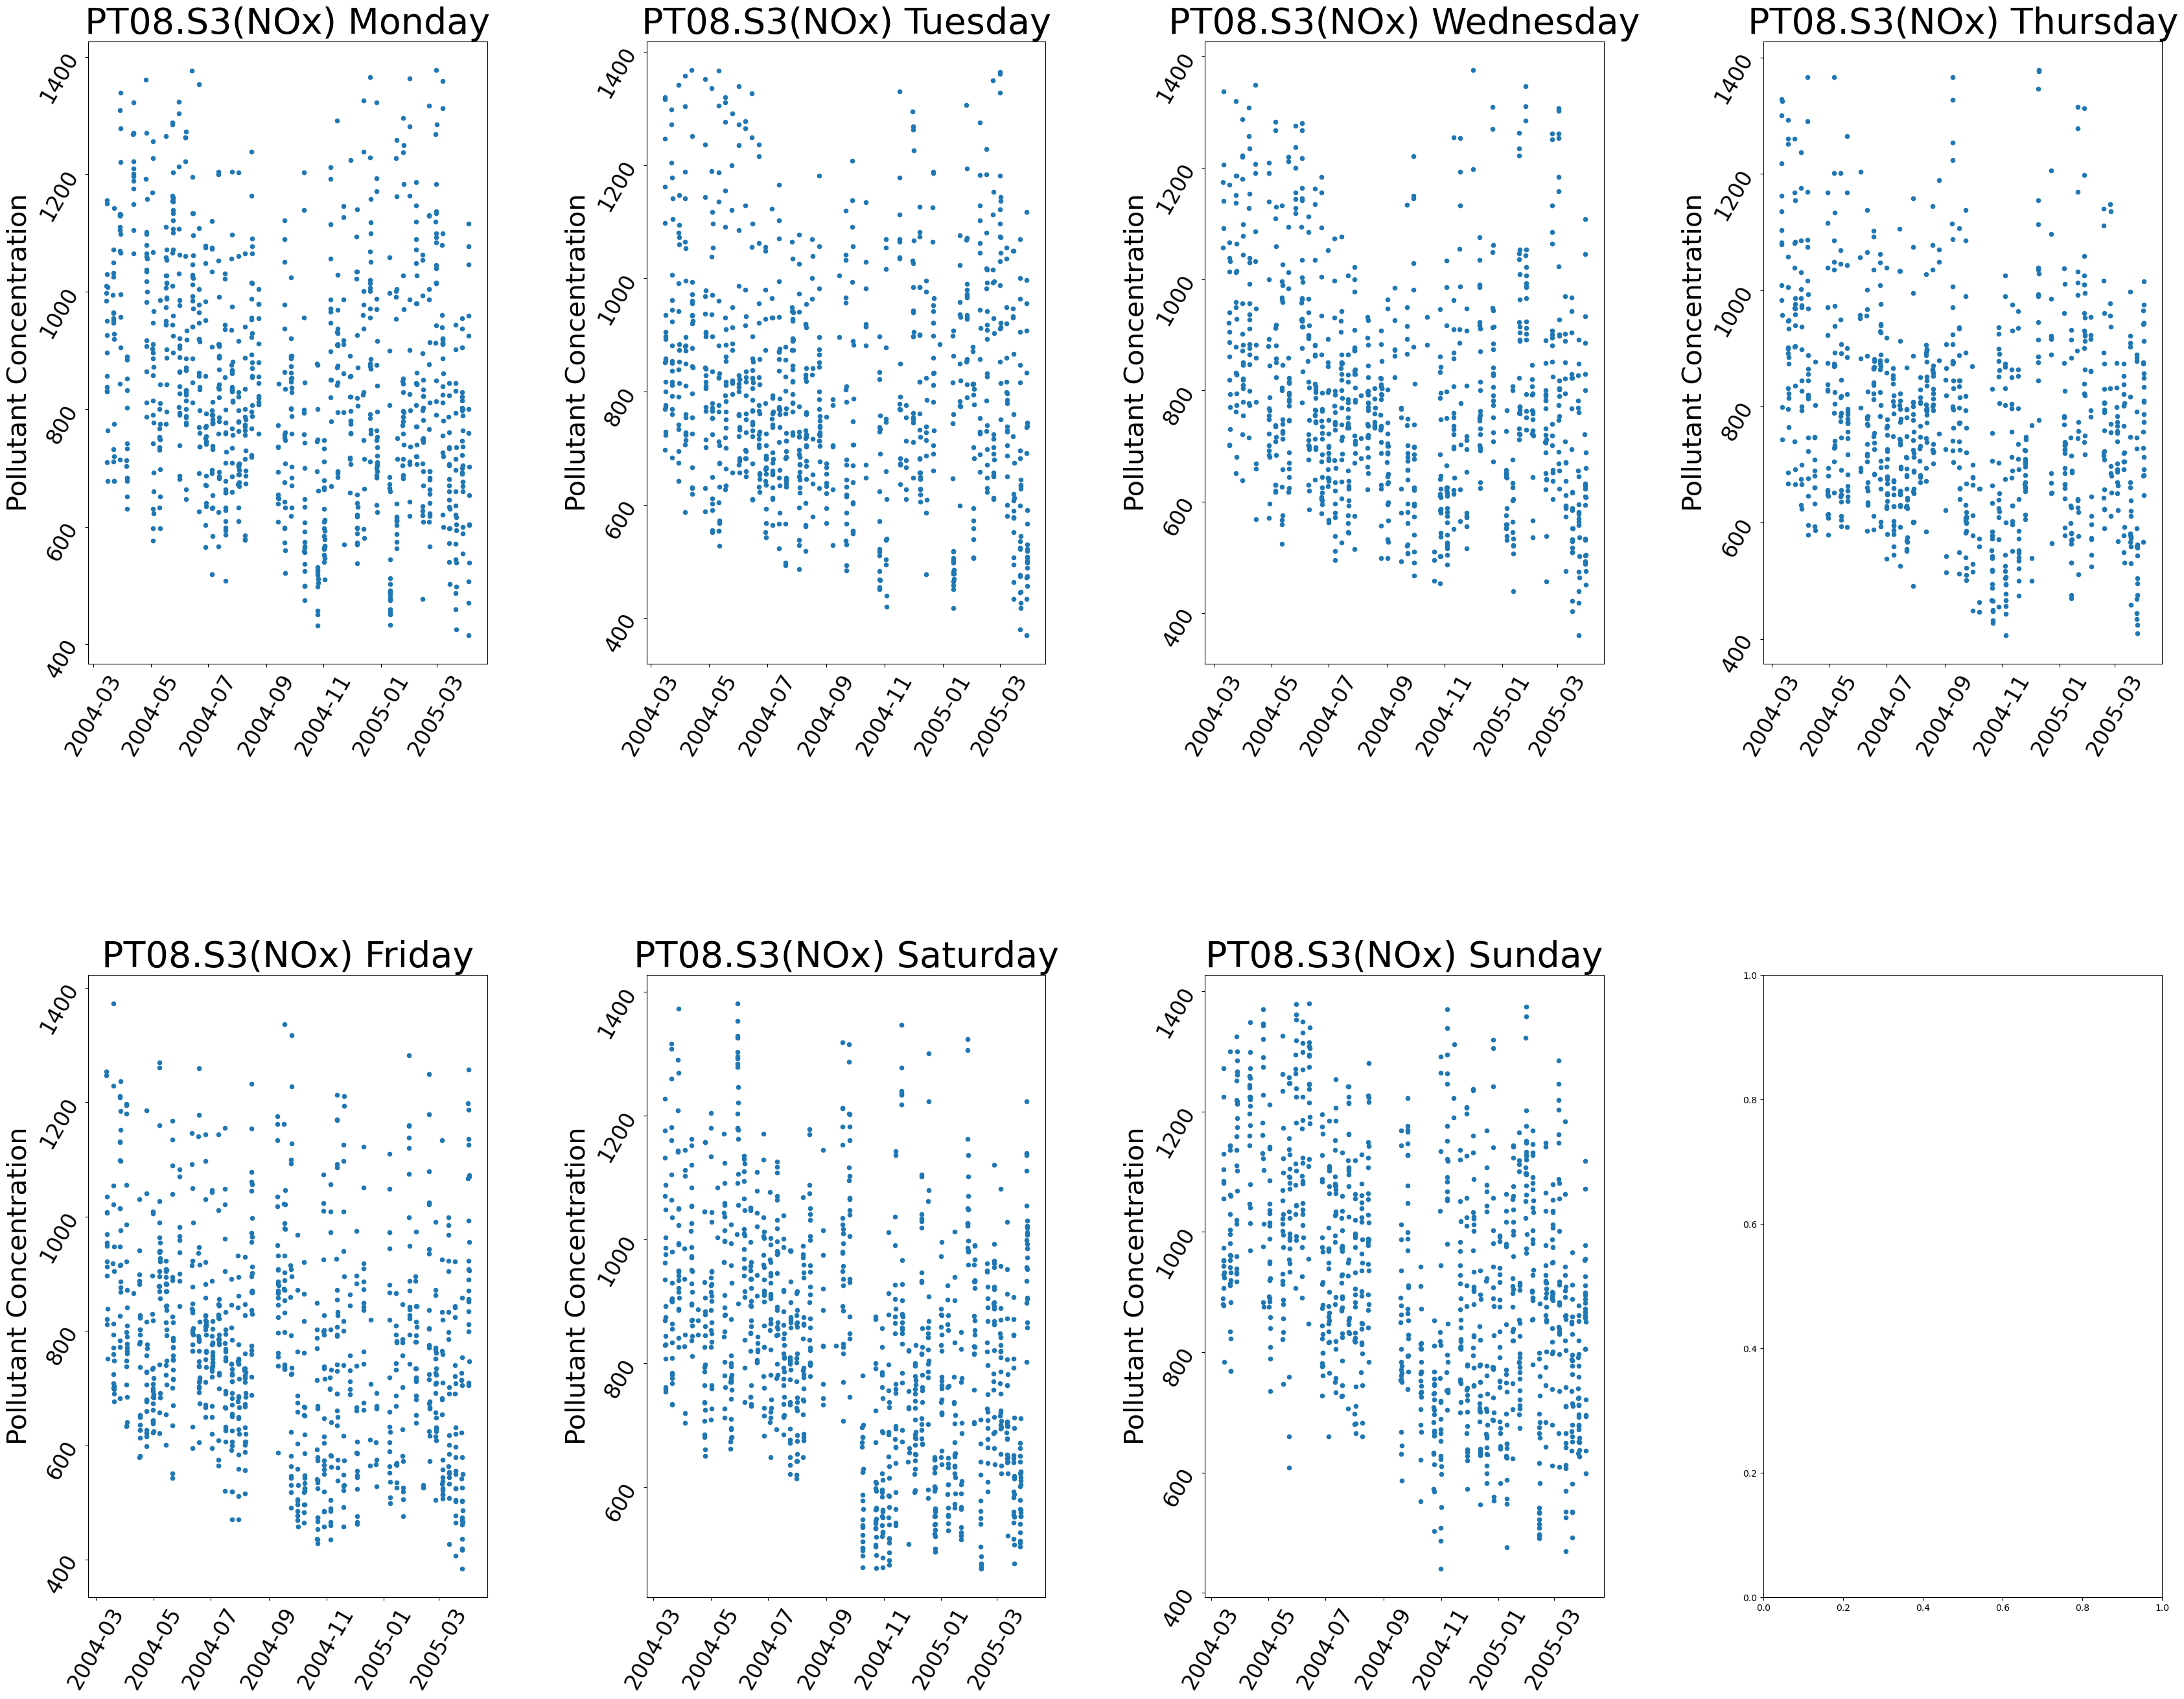

In [23]:
df_time_plotter(day_df_list,'D','PT08.S3(NOx)')


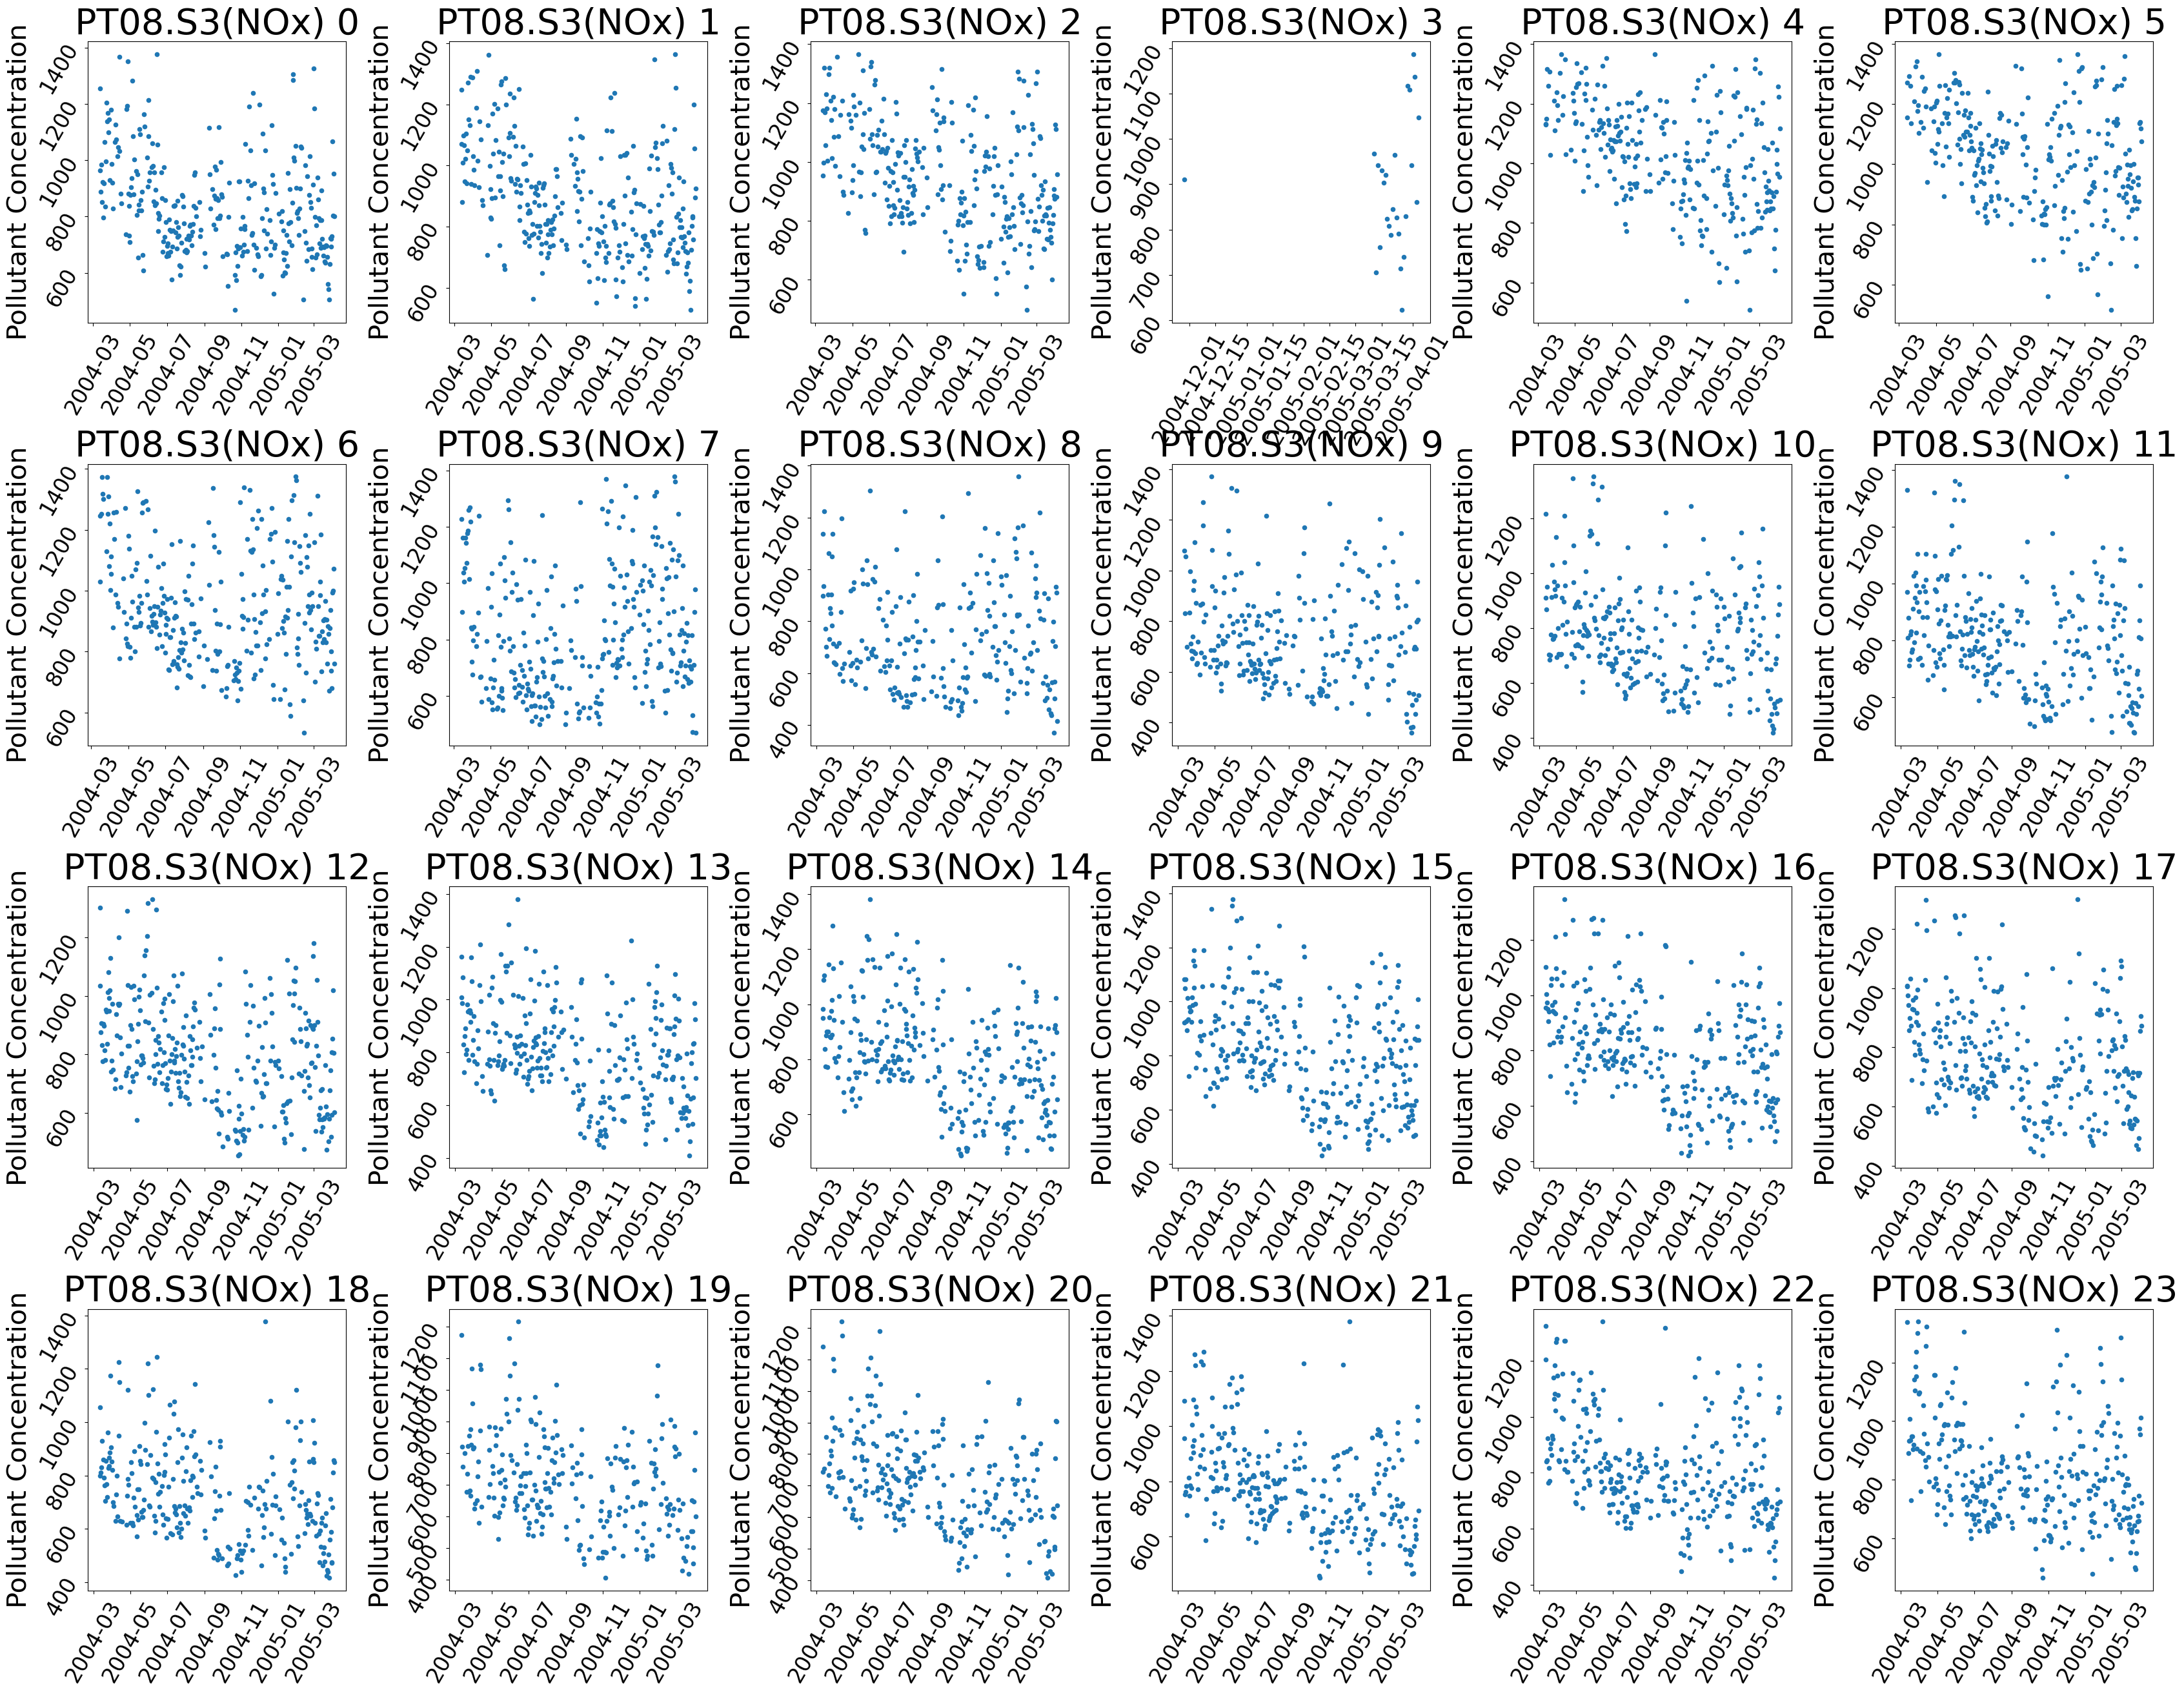

In [24]:
df_time_plotter(hour_df_list,'H','PT08.S3(NOx)')


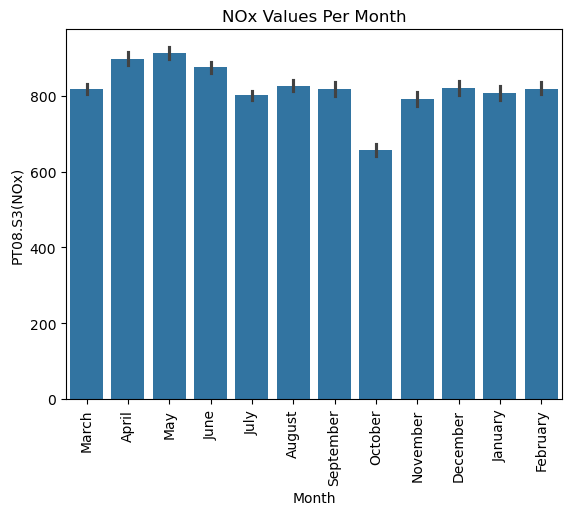

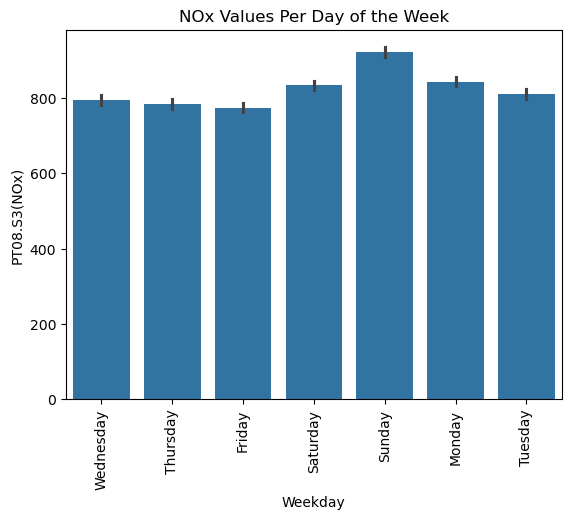

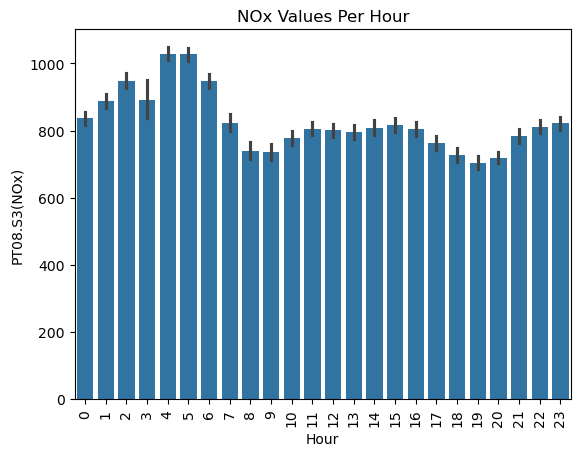

In [25]:
sns.barplot(x = 'Month', y = 'PT08.S3(NOx)', data = df_filtered)
plt.title('NOx Values Per Month')
plt.xticks(rotation=90)
plt.show()

sns.barplot(x = 'Weekday', y = 'PT08.S3(NOx)', data = df_filtered)
plt.title('NOx Values Per Day of the Week')
plt.xticks(rotation=90)
plt.show()

sns.barplot(x = 'Hour', y = 'PT08.S3(NOx)', data = df_filtered)
plt.title('NOx Values Per Hour')
plt.xticks(rotation=90)
plt.show()

In [26]:
df_final = df_filtered.iloc[:, 5:]
df_final

PT08.S1(CO)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3)  \
0          1360.0         1046.0        1056.0        1692.0       1268.0   
1          1292.0          955.0        1174.0        1559.0        972.0   
2          1402.0          939.0        1140.0        1555.0       1074.0   
3          1376.0          948.0        1092.0        1584.0       1203.0   
4          1272.0          836.0        1205.0        1490.0       1110.0   
...           ...            ...           ...           ...          ...   
9352       1314.0         1101.0         539.0        1374.0       1729.0   
9353       1163.0         1027.0         604.0        1264.0       1269.0   
9354       1142.0         1063.0         603.0        1241.0       1092.0   
9355       1003.0          961.0         702.0        1041.0        770.0   
9356       1071.0         1047.0         654.0        1129.0        816.0   

         T    RH      AH  
0     13,6  48,9  0,7578  
1     13,3  47,7  0,7255  
2     11,9  54,0  0,7502  
3     11,0  60,0  0,7867  
4     11,2  59,6  0,7888  
...    ...   ...     ...  
9352  21,9  29,3  0,7568  
9353  24,3  23,7  0,7119  
9354  26,9  18,3  0,6406  
9355  28,3  13,5  0,5139  
9356  28,5  13,1  0,5028  

[6574 rows x 8 columns]

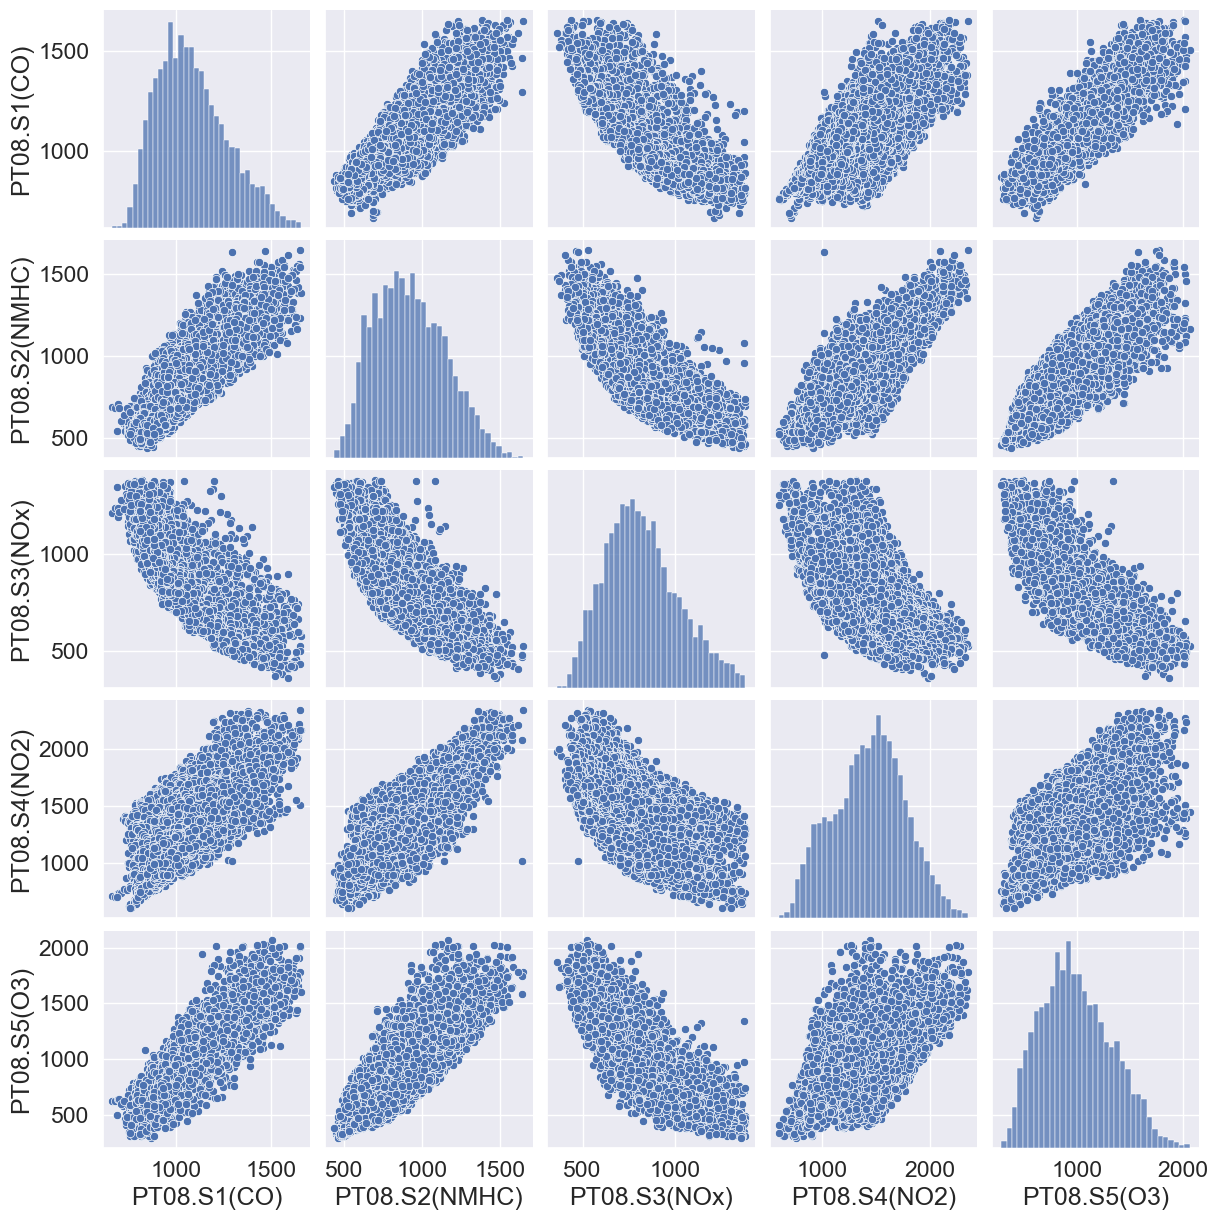

In [27]:
sns.set(font_scale=1.5)
sns.pairplot(df_final)

## Apply Algorithms 

In [28]:
# Load your preprocessed air quality dataset
# Make sure your dataset contains the selected features and the target variable.

# Assuming you have features in 'features' and the target in 'target' columns
features = df_final[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]
target = df_final['PT08.S3(NOx)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# # Normalize the data
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
X_train =X_train.values
X_test =X_test.values
y_train =y_train.values
y_test =y_test.values

In [29]:
# Reshape the data to a 3D tensor [Batchsize, timstamps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [30]:
X_train.shape

(5259, 1, 7)

In [31]:
X_test.shape

(1315, 1, 7)

In [32]:
# Define your LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(128, return_sequences=True,), 
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.2),  # Adding dropout
    tf.keras.layers.Dense(1)
])

d:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.replace(',', '.', regex=True)  # Replace commas with dots
    X_train = X_train.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric
    X_train = X_train.fillna(0)  # Handle NaN values
elif isinstance(X_train, np.ndarray):
    X_train = np.char.replace(X_train.astype(str), ',', '.').astype(float)

# Ensure correct data types
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

# Check the cleaned data
print(X_train[:5])
print(y_train[:5])

[[[9.9100e+02 9.4400e+02 1.6080e+03 8.6800e+02 2.6200e+01 3.8500e+01
   1.2932e+00]]

 [[1.1210e+03 9.8900e+02 1.8210e+03 9.5500e+02 2.8800e+01 4.8800e+01
   1.9039e+00]]

 [[1.0390e+03 8.4500e+02 9.9300e+02 1.2680e+03 3.4000e+00 6.0900e+01
   4.8090e-01]]

 [[9.7300e+02 1.1280e+03 1.6420e+03 8.9400e+02 3.2900e+01 1.5500e+01
   7.6490e-01]]

 [[1.0900e+03 8.4100e+02 1.2020e+03 9.8900e+02 8.7000e+00 7.7600e+01
   8.7530e-01]]]
[765. 659. 775. 813. 757.]


In [34]:
# If X_test is a DataFrame
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.replace(',', '.', regex=True)
    X_test = X_test.apply(pd.to_numeric, errors='coerce')
    X_test = X_test.fillna(0)  # Replace NaN with 0
elif isinstance(X_test, np.ndarray):
    # If X_test is a NumPy array
    X_test = np.char.replace(X_test.astype(str), ',', '.').astype(float)

# Convert to float32
X_test = X_test.astype(np.float32)


In [35]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=250, batch_size=32)


Epoch 1/250
165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 694733.9375
Epoch 2/250
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 669801.8125
Epoch 3/250
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 641698.5000
Epoch 4/250
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 606728.7500
Epoch 5/250
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 586045.3750
Epoch 6/250
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 572783.3125
Epoch 7/250
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 544330.6875
Epoch 8/250
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 518522.5000
Epoch 9/250
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 496877.3438
Epoch 10/250
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 480043.7188
Epoch 11/250
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 457284.6875
Epoch 12/250
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 438027.4062
Epoch 13/250
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 423966.1562
Epoch 14/250
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 7

In [36]:
# Make predictions
y_pred = model.predict(X_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step


In [37]:
y_pred.shape

(1315, 1, 1)

In [38]:
y_test.shape

(1315,)

In [39]:
# Flatten the predictions and ground truth labels
y_pred_flat = y_pred.flatten()

In [40]:
# Evaluate your model using Scikit-learn
mse = mean_squared_error(y_test, y_pred_flat)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 39084.04051129301
